In [17]:
import matplotlib.pyplot as plt
import MDAnalysis as mda
import numpy as np
import MDAnalysis
from MDAnalysis.analysis import rms

In [18]:
u = MDAnalysis.Universe("C:\\Users\\Ari\\Downloads\\pcasuite\\1kkh.bb.1.pdb")

In [19]:
bb = u.select_atoms('backbone')

u.trajectory[0] # first frame
first = bb.positions

u.trajectory[-1] #last frame
last = bb.positions

rms.rmsd(first, last)

2.0759583247041453

In [20]:
ca = u.select_atoms('name CA')
ca.write('calphas.gro')

u.trajectory[0] # set to first frame
rmsd_analysis = rms.RMSD(u, select='backbone', groupselections=['name CA', 'protein'])
rmsd_analysis.run(verbose=True)

In [21]:
print(rmsd_analysis.rmsd.shape)

(10000, 5)


In [22]:
import pandas as pd

rmsd_df = pd.DataFrame(rmsd_analysis.rmsd[:, 2:],
                       columns=['Backbone', 'C-alphas', 'Protein'],
                       index=rmsd_analysis.rmsd[:, 1])
rmsd_df.index.name = 'Time (ps)'
rmsd_df.head()

,Backbone,C-alphas,Protein
Time (ps),,,
0.0,0.000000,0.000000,6.560185e-08
1.0,0.372777,0.371207,3.727772e-01
2.0,0.408532,0.405171,4.085317e-01
3.0,0.453374,0.449098,4.533741e-01
4.0,0.531034,0.529290,5.310345e-01


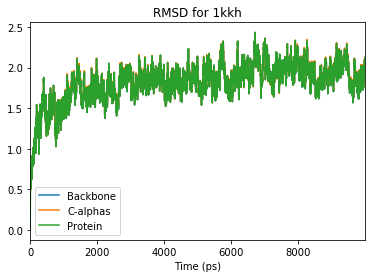

In [23]:
rmsd_df.plot(title='RMSD for 1kkh')